# Linear Regression 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('final_data.csv')

In [5]:
X = df[['age']]     # double brackets → DataFrame
y = df['charges']   # Series is fine

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Making LR using prebuild class

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred = model.predict(X_test_scaled)

In [10]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.04158986801230624


C:\Users\praty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


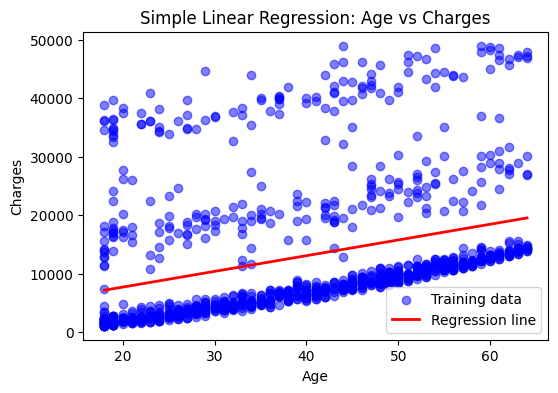

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training data')

# regression line
X_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1)
X_line_scaled = scaler.transform(X_line)
y_line = model.predict(X_line_scaled)

plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression line')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Simple Linear Regression: Age vs Charges")
plt.legend()
plt.show()

## Making LR using My class

In [12]:
def cost_function(X, y, m, c):
    n = len(y)
    y_pred = m * X + c
    return (1/n) * np.sum((y - y_pred)**2)

In [13]:
class MyLinearRegression:
    def __init__(self, lr=1e-5, tol= 20, max_steps=500):
        self.lr = lr
        self.tol = tol
        self.max_steps = max_steps
        self.m = 0
        self.c = 0
        self.history = []

    def fit(self, X, y):
        X = X.flatten()
        n = len(y)

        prev_cost = float('inf')

        for _ in range(self.max_steps):
            y_pred = self.m * X + self.c
            cost = cost_function(X, y, self.m, self.c)

            # stop if cost reduction is tiny → minimum reached
            if abs(prev_cost - cost) < self.tol:
                break

            prev_cost = cost

            dm = (-2/n) * np.sum(X * (y - y_pred))
            dc = (-2/n) * np.sum(y - y_pred)

            self.m -= self.lr * dm
            self.c -= self.lr * dc

            self.history.append((self.m, self.c, cost))

    def predict(self, X):
        return self.m * X.flatten() + self.c

In [14]:
X = df[['age']].values
y = df['charges'].values

my_lr = MyLinearRegression(lr=1e-5)
my_lr.fit(X, y)

print("Final slope:", my_lr.m)
print("Final intercept:", my_lr.c)
print("Final cost:", my_lr.history[-1][2])

Final slope: 323.15632758338734
Final intercept: 8.68353091078883
Final cost: 125256503.9683045


In [15]:
model.coef_

array([3760.5131965])

In [16]:
model.intercept_

np.float64(12913.646616541353)

C:\Users\praty\AppData\Local\Temp\ipykernel_16508\1997084471.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


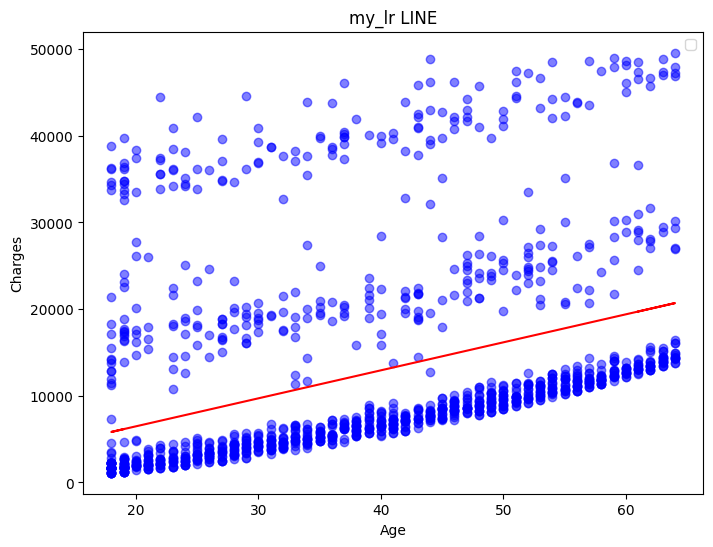

In [17]:
m = my_lr.m
c = my_lr.c

# X and y from dataset
X = df[['age']].values.flatten()
y = df['charges'].values

# predicted line using YOUR slope & intercept
y_pred = m * X + c

# plot
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, y_pred, color='red')

plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("my_lr LINE")
plt.legend()
plt.show()

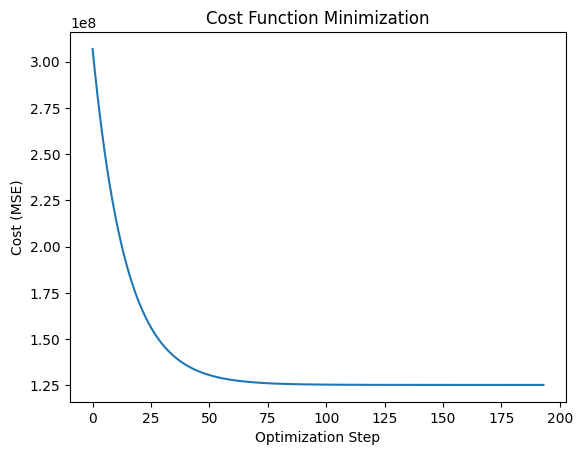

In [18]:
costs = [h[2] for h in my_lr.history]

plt.plot(costs)
plt.xlabel("Optimization Step")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Minimization")
plt.show()

In [19]:
X = df[['age']].values.flatten()
y = df['charges'].values

history = my_lr.history   # [(m, c, cost), ...]

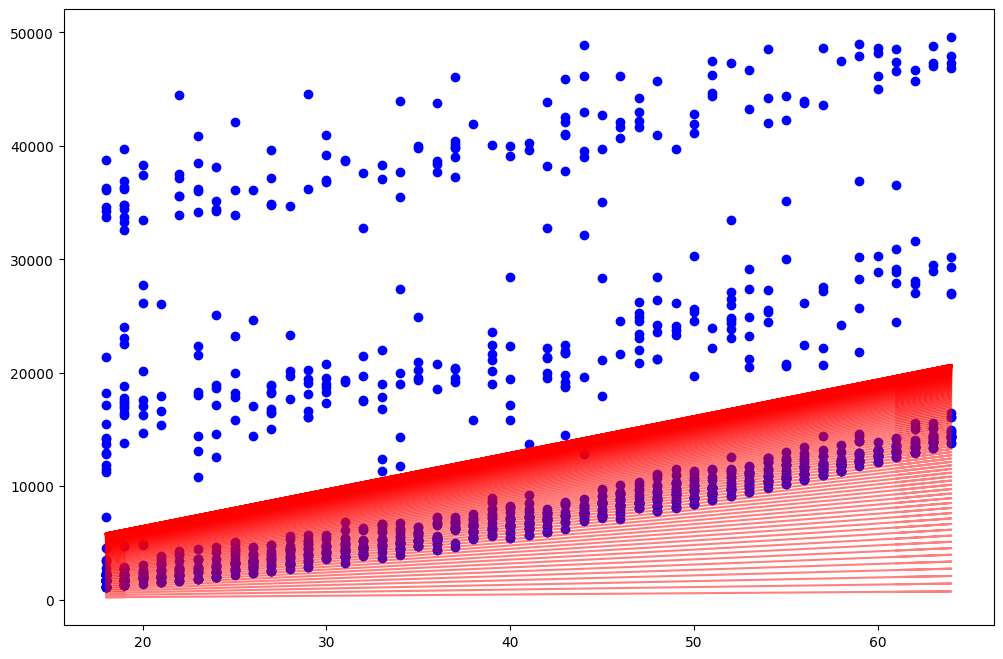

In [20]:
plt.figure(figsize=(12,8))
for i, (m, c, cost) in enumerate(history):
    y_line = m * X + c
    plt.plot(X, y_line, color='red',alpha = 0.5)
plt.scatter(X, y, color='blue', alpha=1, label='Data Points')